In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/dataset/util.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, Sequence
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [4]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [5]:
%matplotlib inline

In [6]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [7]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [8]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

01/28/2020 19:44:57 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 19:45:17 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 19:50:02 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 19:50:23 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 19:55:10 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub23_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 19:55:31 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub25_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 20:00:14 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 20:00:34 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

In [9]:
dtfa.load_state('data/affvids_mc_norest_rz_k100_n1000_01232020_000625') 

In [10]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in affvids_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz', num_factors=100)

01/28/2020 20:07:42 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 20:07:59 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 20:12:11 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 20:12:30 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 20:17:04 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub23_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 20:17:24 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub25_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/28/2020 20:22:09 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/28/2020 20:22:30 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

In [11]:
htfa.load_state('data/affvids_norest_k100_n1000_01242020_230748')

In [212]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

def high_low_labeler(task):
    if 'high' in task:
        return 'high'
    elif 'low' in task:
        return 'low'
    else:
        return None

In [13]:
def block_task_labeler(block):
    return task_labeler(block.task)

def block_high_low_labeler(block):
    if 'high' in block.task:
        return 'high'
    elif 'low' in block.task:
        return 'low'
    else:
        return None

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

In [15]:
def block_subject_labeler(block):
    return subject_labeler(block.subject)

In [343]:
def classification_pipeline(data,targets,scoring="roc_auc",input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [344]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()


In [345]:
### task classification using leave one out runs on NTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/CI Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.9896 +- 0.0147
Chance Scores: 0.5833 +- 0.0295
Processing Social threat
Scores: 0.9479 +- 0.0531
Chance Scores: 0.5417 +- 0.0295
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1350
...
Overall Score: 0.9792 +- 0.0390
Overall Dummy Score: 0.5417 +- 0.0884


Processing Subject 11
Processing Heights
Scores: 0.8512 +- 0.1388
Chance Scores: 0.4911 +- 0.1474
Processing Social threat
Scores: 0.9003 +- 0.0331
Chance Scores: 0.4315 +- 0.1459
Processing Spiders
Scores: 0.8576 +- 0.0762
Chance Scores: 0.5347 +- 0.0260
...
Overall Score: 0.8697 +- 0.0959
Overall Dummy Score: 0.4858 +- 0.1279


Processing Subject 12
Processing Heights
Scores: 0.4896 +- 0.0820
Chance Scores: 0.5972 +- 0.1525
Processing Social threat
Scores: 0.5327 +- 0.1021
Chance Scores: 0.5119 +- 0.1466
Processing Spiders
Scores: 0.6146 +- 0.1699
Chance Scores: 0.4970 +- 0.0547
...
Overall Score: 0.5456 +- 0.1343
Overall Dummy Score: 0.5354 +- 0.1336


Proc

In [346]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject 10
Processing Heights
Scores: 0.9271 +- 0.0390
Chance Scores: 0.4167 +- 0.1062
Processing Social threat
Scores: 0.9375 +- 0.0442
Chance Scores: 0.4375 +- 0.1531
Processing Spiders
Scores: 0.9479 +- 0.0390
Chance Scores: 0.4375 +- 0.1768
...
Overall Score: 0.9375 +- 0.0417
Overall Dummy Score: 0.4306 +- 0.1486


Processing Subject 11
Processing Heights
Scores: 0.6622 +- 0.0406
Chance Scores: 0.4375 +- 0.1350
Processing Social threat
Scores: 0.8438 +- 0.0765
Chance Scores: 0.5179 +- 0.1907
Processing Spiders
Scores: 0.6910 +- 0.1756
Chance Scores: 0.3889 +- 0.1543
...
Overall Score: 0.7323 +- 0.1383
Overall Dummy Score: 0.4481 +- 0.1702


Processing Subject 12
Processing Heights
Scores: 0.3819 +- 0.2172
Chance Scores: 0.4722 +- 0.0708
Processing Social threat
Scores: 0.6057 +- 0.0807
Chance Scores: 0.5714 +- 0.0913
Processing Spiders
Scores: 0.5060 +- 0.1094
Chance Scores: 0.4732 +- 0.0768
...
Overall Score: 0.4979 +- 0.1740
Overall Dummy Score: 0.5056 +- 0.0927


Proc

In [347]:
### task classification using leave one out runs on input data###
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject 10
Processing Heights
Scores: 0.9688 +- 0.0442
Chance Scores: 0.4167 +- 0.0295
Processing Social threat
Scores: 0.9792 +- 0.0295
Chance Scores: 0.5000 +- 0.1840
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4375 +- 0.0000
...
Overall Score: 0.9826 +- 0.0333
Overall Dummy Score: 0.4514 +- 0.1133


Processing Subject 11
Processing Heights
Scores: 0.8735 +- 0.1315
Chance Scores: 0.5506 +- 0.2498
Processing Social threat
Scores: 0.9345 +- 0.0259
Chance Scores: 0.4375 +- 0.0884
Processing Spiders
Scores: 0.8924 +- 0.0603
Chance Scores: 0.5000 +- 0.2339
...
Overall Score: 0.9001 +- 0.0886
Overall Dummy Score: 0.4960 +- 0.2092


Processing Subject 12
Processing Heights
Scores: 0.3056 +- 0.0982
Chance Scores: 0.5903 +- 0.1581
Processing Social threat
Scores: 0.6548 +- 0.0421
Chance Scores: 0.4732 +- 0.0263
Processing Spiders
Scores: 0.6890 +- 0.1125
Chance Scores: 0.4494 +- 0.0374
...
Overall Score: 0.5498 +- 0.1950
Overall Dummy Score: 0.5043 +- 0.1132


Proc

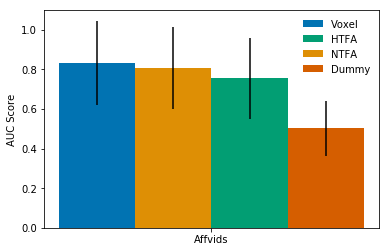

In [348]:
voxel_accuracies = np.mean(voxel_summary_result)
voxel_errs = np.std(voxel_summary_result)
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies.pdf')

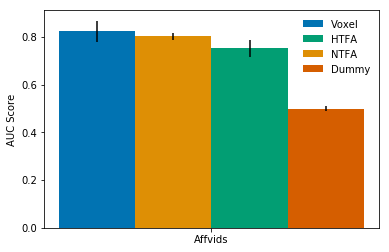

In [349]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means)# * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) #* stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result)# * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) #* stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_se.pdf')

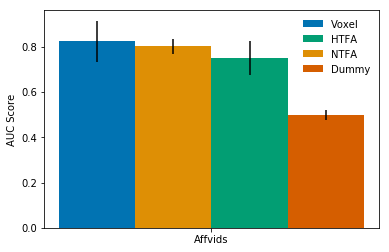

In [350]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [351]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=6.918591932237187, pvalue=2.4350986793814247e-08)

In [352]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [353]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())
spider_matrix = []
social_matrix = []
heights_matrix = []
all_matrix = []

spider_matrix_p = []
social_matrix_p = []
heights_matrix_p = []
all_matrix_p = []
for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'Spiders':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        spider_matrix.append(r)
        spider_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'Social threat':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        social_matrix.append(r)
        social_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'Heights':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        heights_matrix.append(r)
        heights_matrix_p.append(p)

        
        
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))
all_matrix = np.array(all_matrix)

spider_matrix_p = (np.array(spider_matrix_p))
social_matrix_p = (np.array(social_matrix_p))
heights_matrix_p = (np.array(heights_matrix_p))
all_matrix_p = np.array(all_matrix_p)

spider_matrix = spider_matrix * spider_matrix_p
social_matrix = social_matrix * social_matrix_p
heights_matrix = heights_matrix * heights_matrix_p
all_matrix = all_matrix * all_matrix_p

all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
spider_vectors_p = np.zeros(shape=(spider_matrix_p.shape[0],4950))

for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)
    spider_vectors_p[i,:] = distance.squareform(spider_matrix_p[i,:,:],checks=False)


social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
social_vectors_p = np.zeros(shape=(social_matrix_p.shape[0],4950))

for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    social_vectors_p[i,:] = distance.squareform(social_matrix_p[i,:,:],checks=False)

    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
heights_vectors_p = np.zeros(shape=(heights_matrix_p.shape[0],4950))

for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    heights_vectors_p[i,:] = distance.squareform(heights_matrix_p[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [354]:
all_vectors[0].shape

(4950,)

In [355]:
### task classification using leave one out runs on NTFA using functional connectivity###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/CI Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.8125 +- 0.0884
Chance Scores: 0.4167 +- 0.1473
Processing Social threat
Scores: 0.9271 +- 0.0531
Chance Scores: 0.5417 +- 0.1062
Processing Spiders
Scores: 0.8854 +- 0.0737
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.8750 +- 0.0872
Overall Dummy Score: 0.5000 +- 0.1502


Processing Subject 11
Processing Heights
Scores: 0.5923 +- 0.0900
Chance Scores: 0.4970 +- 0.1337
Processing Social threat
Scores: 0.8393 +- 0.0636
Chance Scores: 0.5179 +- 0.1552
Processing Spiders
Scores: 0.6910 +- 0.0723
Chance Scores: 0.4792 +- 0.0780
...
Overall Score: 0.7075 +- 0.1269
Overall Dummy Score: 0.4980 +- 0.1275


Processing Subject 12
Processing Heights
Scores: 0.3368 +- 0.0344
Chance Scores: 0.5069 +- 0.1107
Processing Social threat
Scores: 0.3229 +- 0.1495
Chance Scores: 0.4494 +- 0.0661
Processing Spiders
Scores: 0.6280 +- 0.1368
Chance Scores: 0.4226 +- 0.1207
...
Overall Score: 0.4292 +- 0.1840
Overall Dummy Score: 0.4597 +- 0.1079


Proc

In [356]:
### functional connectivity using HTFA ###

spider_matrix = []
social_matrix = []
heights_matrix = []
all_matrix = []

spider_matrix_p = []
social_matrix_p = []
heights_matrix_p = []
all_matrix_p = []
for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'Spiders':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        spider_matrix.append(r)
        spider_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'Social threat':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        social_matrix.append(r)
        social_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'Heights':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        heights_matrix.append(r)
        heights_matrix_p.append(p)

        
        
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))
all_matrix = np.array(all_matrix)

spider_matrix_p = (np.array(spider_matrix_p))
social_matrix_p = (np.array(social_matrix_p))
heights_matrix_p = (np.array(heights_matrix_p))
all_matrix_p = np.array(all_matrix_p)

spider_matrix = spider_matrix * spider_matrix_p
social_matrix = social_matrix * social_matrix_p
heights_matrix = heights_matrix * heights_matrix_p
all_matrix = all_matrix * all_matrix_p

all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
spider_vectors_p = np.zeros(shape=(spider_matrix_p.shape[0],4950))

for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)
    spider_vectors_p[i,:] = distance.squareform(spider_matrix_p[i,:,:],checks=False)


social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
social_vectors_p = np.zeros(shape=(social_matrix_p.shape[0],4950))

for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    social_vectors_p[i,:] = distance.squareform(social_matrix_p[i,:,:],checks=False)

    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
heights_vectors_p = np.zeros(shape=(heights_matrix_p.shape[0],4950))

for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    heights_vectors_p[i,:] = distance.squareform(heights_matrix_p[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [357]:
### task classification using leave one out runs on HTFA using functional connectivity###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

subjects = OrderedSet([b.subject for b in htfa._blocks])

for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(htfa.num_blocks):
        if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print ('...')
print("HTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.8542 +- 0.0966
Chance Scores: 0.3333 +- 0.0589
Processing Social threat
Scores: 0.9479 +- 0.0390
Chance Scores: 0.6042 +- 0.1640
Processing Spiders
Scores: 0.8021 +- 0.0966
Chance Scores: 0.6042 +- 0.2062
...
Overall Score: 0.8681 +- 0.1018
Overall Dummy Score: 0.5139 +- 0.2015


Processing Subject 11
Processing Heights
Scores: 0.5536 +- 0.0526
Chance Scores: 0.3452 +- 0.0661
Processing Social threat
Scores: 0.8080 +- 0.1295
Chance Scores: 0.3244 +- 0.0374
Processing Spiders
Scores: 0.6424 +- 0.1449
Chance Scores: 0.4583 +- 0.1640
...
Overall Score: 0.6680 +- 0.1570
Overall Dummy Score: 0.3760 +- 0.1198


Processing Subject 12
Processing Heights
Scores: 0.3368 +- 0.1663
Chance Scores: 0.6111 +- 0.2643
Processing Social threat
Scores: 0.3720 +- 0.1096
Chance Scores: 0.6607 +- 0.2067
Processing Spiders
Scores: 0.3601 +- 0.2063
Chance Scores: 0.5357 +- 0.0718
...
Overall Score: 0.3563 +- 0.1662
Overall Dummy Score: 0.6025 +- 0.2046


Proc

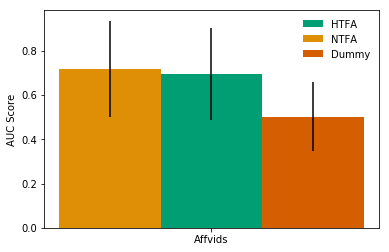

In [358]:
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_accuracies.pdf')

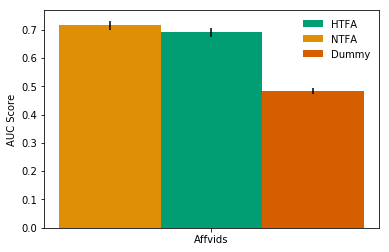

In [359]:
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_se_accuracies.pdf')

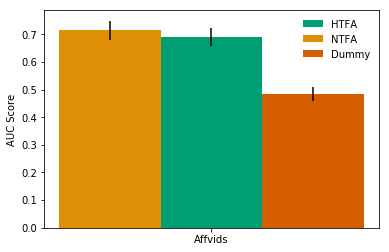

In [360]:
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_ci_accuracies.pdf')

In [361]:
dtfa.subjects()

OrderedSet([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 25, 26, 28, 29, 4, 5, 6, 7, 8, 9])